In [17]:
import pandas as pd
import nltk
import re
import seaborn as sns
#Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [23]:
data = pd.read_csv("data.csv")
print(data.isnull().sum())
#to check if any data is missing
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)

Product_name    0
Review          0
Rating          0
dtype: int64


In [6]:
print(data.head())

                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  best  great performancei got around  backup bi...       5  
1                                        good perfom       5  
2  great perform usual also game laptop issu batt...       5  
3                        wife happi best product 👌🏻😘       5  
4  light weight laptop new amaz featur batteri li...       5  


In [7]:
#HOW PEOPLE HAVE RATED (VISUALIZED USING PLOTLY)
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

In [11]:
import plotly.express as px
figure = px.pie(data, values=quantity, names=numbers, hole = 0.7)
figure.show()

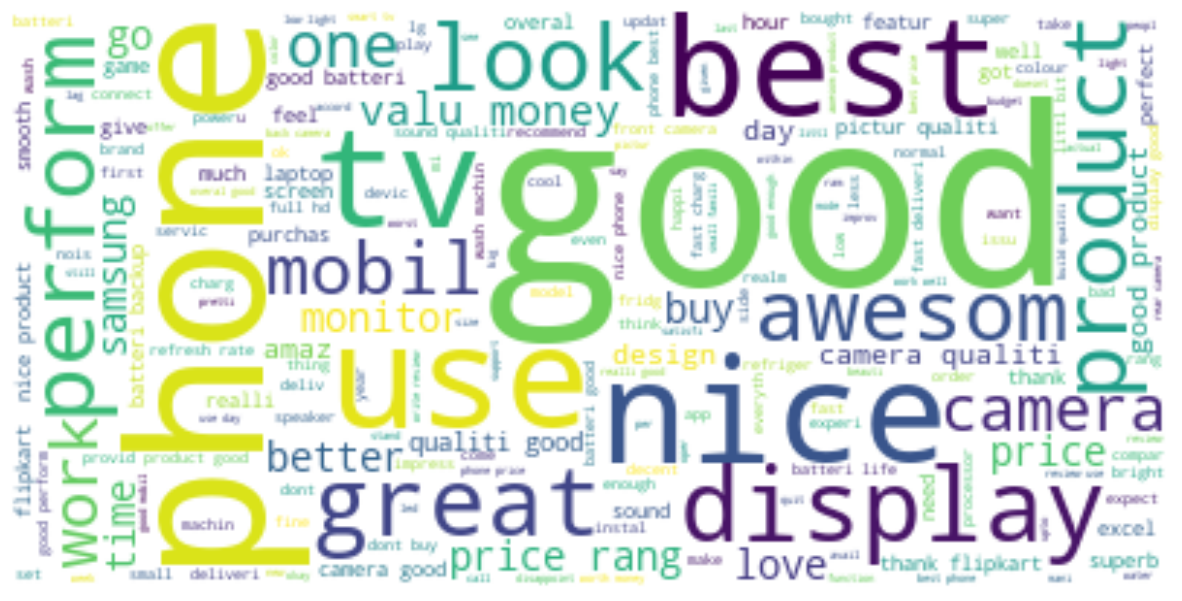

In [19]:
#WORDCLOUD GENRATED USING WORDCLOUD 
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
#Analyzing sentiments
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


                                              Review  Positive  Negative  \
0  best  great performancei got around  backup bi...     0.395     0.101   
1                                        good perfom     0.744     0.000   
2  great perform usual also game laptop issu batt...     0.277     0.000   
3                        wife happi best product 👌🏻😘     0.512     0.000   
4  light weight laptop new amaz featur batteri li...     0.000     0.000   

   Neutral  
0    0.504  
1    0.256  
2    0.723  
3    0.488  
4    1.000  


In [21]:
#what is the sentiment of most of the people 
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [22]:
print("Positive: ",x)
print("Negative: ",y)
print("Neutral: ",z)

Positive:  923.5529999999985
Negative:  96.77500000000013
Neutral:  1283.6880000000006
